In [1]:
import os
import supervision as sv
from tqdm import tqdm
import cv2
from autodistill.detection import CaptionOntology
from autodistill_grounded_sam import GroundedSAM
from pathlib import Path

Importing from timm.models.layers is deprecated, please import via timm.layers


In [2]:
!pip show supervision


Name: supervision
Version: 0.26.0
Summary: A set of easy-to-use utils that will come in handy in any Computer Vision project
Home-page: https://github.com/roboflow/supervision
Author: 
Author-email: Piotr Skalski <piotr.skalski92@gmail.com>
License: MIT
Location: /home/msathena/autodistill_env/lib/python3.10/site-packages
Requires: defusedxml, matplotlib, numpy, opencv-python, pillow, pyyaml, requests, scipy, tqdm
Required-by: autodistill, autodistill-grounded-sam, rf-groundingdino


In [2]:
# HOME = os.getcwd()
HOME = "/home/msathena/pika/pikaros2/pika_bags/images"
print(HOME)
IMAGE_DIR_PATH = f"{HOME}/hand-camera-01_0/sample"
DATASET_DIR_PATH = f"{HOME}/hand-camera-01_0/dataset"
Path(DATASET_DIR_PATH).mkdir(parents=True, exist_ok=True)

OUTPUT_DIR = f"{HOME}/hand-camera-01_0/vis"
Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)

FRAME_STRIDE = 1
image_paths = sv.list_files_with_extensions(
    directory=IMAGE_DIR_PATH,
    extensions=["png", "jpg", "jpg"])

print('image count:', len(image_paths))

/home/msathena/pika/pikaros2/pika_bags/images
image count: 10


In [5]:
# VIDEO_DIR_PATH = f"{HOME}/videos"
# IMAGE_DIR_PATH = f"{HOME}/hand-camera-01_0/left"
# FRAME_STRIDE = 1

# video_paths = sv.list_files_with_extensions(
#     directory=VIDEO_DIR_PATH,
#     extensions=["mov", "mp4"])
# print (video_paths)
# TRAIN_VIDEO_PATHS= video_paths
# # TEST_VIDEO_PATHS, TRAIN_VIDEO_PATHS = video_paths[:2], video_paths[2:]
# print(TRAIN_VIDEO_PATHS)
# for video_path in tqdm(TRAIN_VIDEO_PATHS):
#     video_name = video_path.stem
#     image_name_pattern = video_name + "-{:05d}.png"
#     with sv.ImageSink(target_dir_path=IMAGE_DIR_PATH, image_name_pattern=image_name_pattern) as sink:
#         for image in sv.get_video_frames_generator(source_path=str(video_path), stride=FRAME_STRIDE):
#             sink.save_image(image=image)

# image_paths = sv.list_files_with_extensions(
#     directory=IMAGE_DIR_PATH,
#     extensions=["png", "jpg", "jpg"])

# print('image count:', len(image_paths))

image count: 419


In [61]:
SAMPLE_SIZE = 16
SAMPLE_GRID_SIZE = (4, 4)
SAMPLE_PLOT_SIZE = (16, 10)

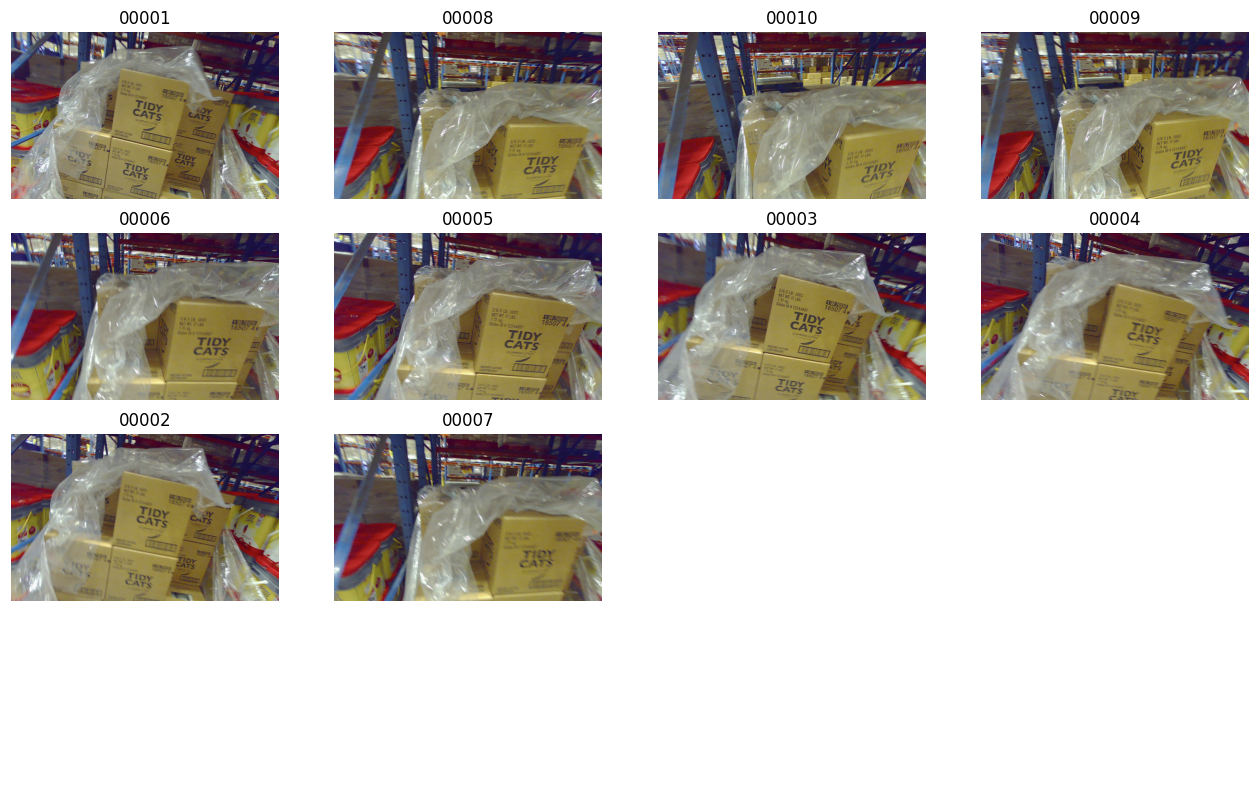

In [62]:
import cv2
import supervision as sv

titles = [
    image_path.stem
    for image_path
    in image_paths[:SAMPLE_SIZE]]
images = [
    cv2.imread(str(image_path))
    for image_path
    in image_paths[:SAMPLE_SIZE]]

sv.plot_images_grid(images=images, titles=titles, grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)

In [34]:
# import cv2
# import os
# from pathlib import Path
# import shutil

# # Paths
# bgr_folder = Path(IMAGE_DIR_PATH)
# rgb_folder = bgr_folder.parent / (bgr_folder.name + "_rgb")

# # Clean/create output folder
# if rgb_folder.exists():
#     shutil.rmtree(rgb_folder)
# rgb_folder.mkdir(parents=True)

In [35]:
# # Convert BGR to RGB
# for image_path in bgr_folder.glob("*.png"):
#     bgr_image = cv2.imread(str(image_path))
#     rgb_image = cv2.cvtColor(bgr_image, cv2.COLOR_BGR2RGB)
#     cv2.imwrite(str(rgb_folder / image_path.name), rgb_image)

In [63]:
print(DATASET_DIR_PATH)
print(IMAGE_DIR_PATH)

/home/msathena/pika/pikaros2/pika_bags/images/hand-camera-01_0/dataset
/home/msathena/pika/pikaros2/pika_bags/images/hand-camera-01_0/sample


In [4]:
ontology=CaptionOntology({
    "tidy cats brown cardboard boxes": "box",
})

base_model = GroundedSAM(ontology=ontology, box_threshold=0.2, text_threshold=0.2)
dataset = base_model.label(
    input_folder=str(IMAGE_DIR_PATH),
    extension=".png",
    output_folder=DATASET_DIR_PATH,
    record_confidence=True)

trying to load grounding dino directly
final text_encoder_type: bert-base-uncased


Labeling /home/msathena/pika/pikaros2/pika_bags/images/hand-camera-01_0/sample/00007.png: 100%|█████████████████████████████████████████████████████████████████████████████| 10/10 [00:09<00:00,  1.07it/s]


Saved confidence file: /home/msathena/pika/pikaros2/pika_bags/images/hand-camera-01_0/dataset/annotations/confidence-00001.txt
Saved confidence file: /home/msathena/pika/pikaros2/pika_bags/images/hand-camera-01_0/dataset/annotations/confidence-00008.txt
Saved confidence file: /home/msathena/pika/pikaros2/pika_bags/images/hand-camera-01_0/dataset/annotations/confidence-00010.txt
Saved confidence file: /home/msathena/pika/pikaros2/pika_bags/images/hand-camera-01_0/dataset/annotations/confidence-00009.txt
Saved confidence file: /home/msathena/pika/pikaros2/pika_bags/images/hand-camera-01_0/dataset/annotations/confidence-00006.txt
Saved confidence file: /home/msathena/pika/pikaros2/pika_bags/images/hand-camera-01_0/dataset/annotations/confidence-00005.txt
Saved confidence file: /home/msathena/pika/pikaros2/pika_bags/images/hand-camera-01_0/dataset/annotations/confidence-00003.txt
Saved confidence file: /home/msathena/pika/pikaros2/pika_bags/images/hand-camera-01_0/dataset/annotations/confi

In [5]:
ANNOTATIONS_DIRECTORY_PATH = f"{DATASET_DIR_PATH}/train/labels"
IMAGES_DIRECTORY_PATH = f"{DATASET_DIR_PATH}/train/images"
DATA_YAML_PATH = f"{DATASET_DIR_PATH}/data.yaml"

dataset = sv.DetectionDataset.from_yolo(
    images_directory_path=IMAGES_DIRECTORY_PATH,
    annotations_directory_path=ANNOTATIONS_DIRECTORY_PATH,
    data_yaml_path=DATA_YAML_PATH)

len(dataset)

8

In [40]:
!pip install pillow

In [6]:
import os
import cv2
from PIL import Image
from pathlib import Path
from tqdm import tqdm

# OUTPUT_DIR = f"{DATASET_DIR_PATH}/vis"
Path(OUTPUT_DIR).mkdir(parents=True, exist_ok=True)
SAMPLE_SIZE = 4
SAMPLE_GRID_SIZE = (2, 2)
SAMPLE_PLOT_SIZE = (16, 10)

mask_annotator = sv.MaskAnnotator(color_lookup=sv.ColorLookup.INDEX)
box_annotator = sv.BoxAnnotator()
label_annotator = sv.LabelAnnotator()

images = []
image_names = []
for i, (image_path, image, annotation) in enumerate(tqdm(dataset)):
    # if i == SAMPLE_SIZE:
    #     break
    annotated_image = image.copy()
    annotated_image = mask_annotator.annotate(
        scene=annotated_image, detections=annotation)
    annotated_image = box_annotator.annotate(
        scene=annotated_image, detections=annotation)
    annotated_image = label_annotator.annotate(
        scene=annotated_image, detections=annotation)

    # Save image
    image_name = Path(image_path).name
    output_path = os.path.join(OUTPUT_DIR, image_name)

    # Convert RGB (supervision) to BGR (OpenCV)
    # annotated_image_bgr = annotated_image[:, :, ::-1]
    cv2.imwrite(output_path, annotated_image)
    # Image.fromarray(annotated_image_bgr).save(output_path)

    image_names.append(Path(image_path).name)
    images.append(annotated_image)

# sv.plot_images_grid(
#     images=images,
#     titles=image_names,
#     grid_size=SAMPLE_GRID_SIZE, size=SAMPLE_PLOT_SIZE)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:00<00:00, 19.96it/s]
